In [84]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid", {'axes.grid' : False})

In [85]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [86]:
df.shape

(150, 5)

In [87]:
#Checking For All Values and their Count
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

# Performing EDA

### 2-D Scatter Plot

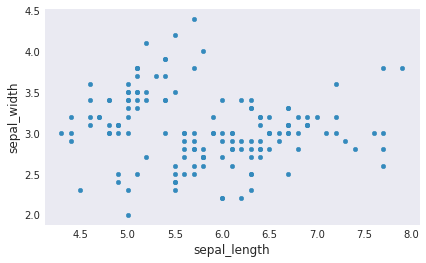

In [88]:
df.plot(kind='scatter', x = 'sepal_length', y = 'sepal_width', grid=False)
plt.show()

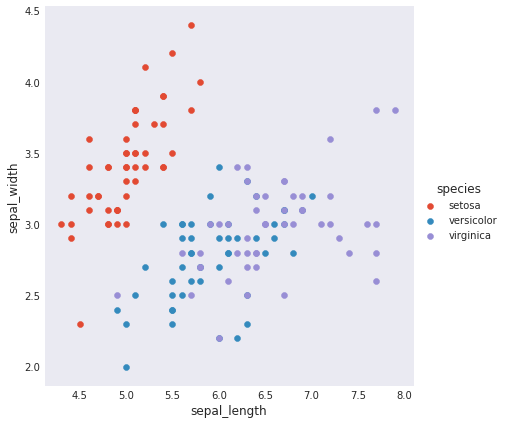

In [89]:
#Plotting Species with color-coding

#hue: by which col should it color points

sns.FacetGrid(df, hue="species", height=6).map(plt.scatter, 'sepal_length', 'sepal_width').add_legend() 
plt.show()

### PairPlot

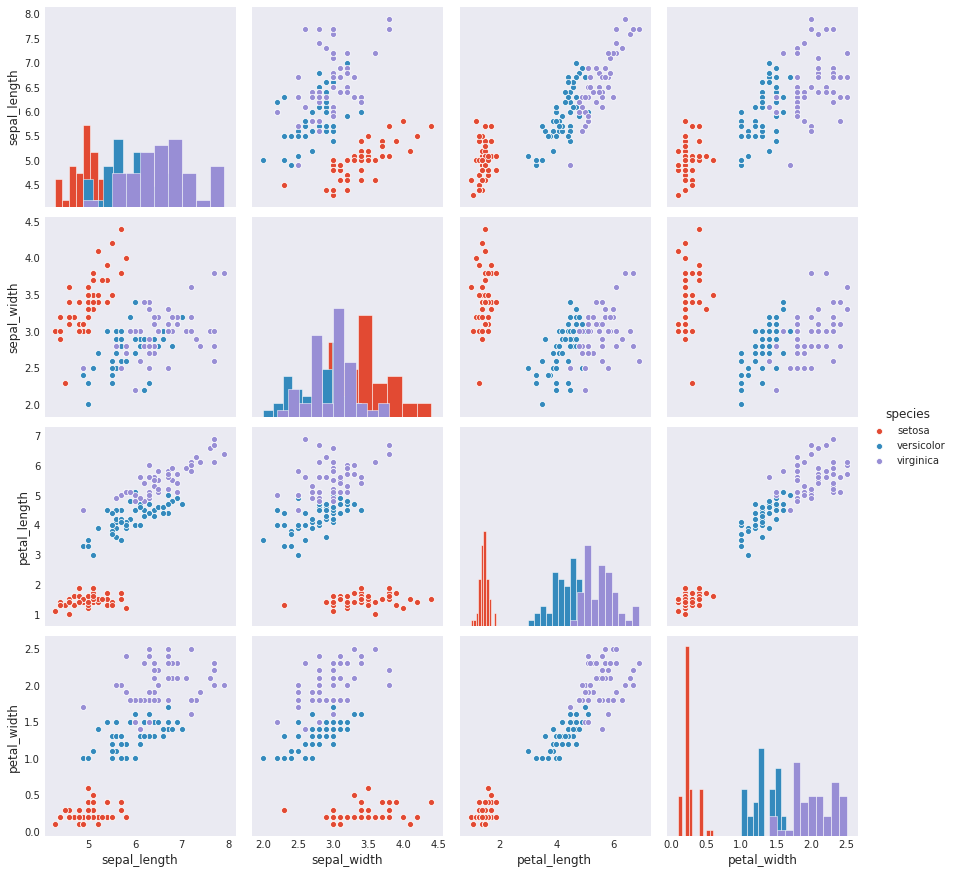

In [135]:
sns.pairplot(df, hue="species",height=3, diag_kind='hist')
plt.show()

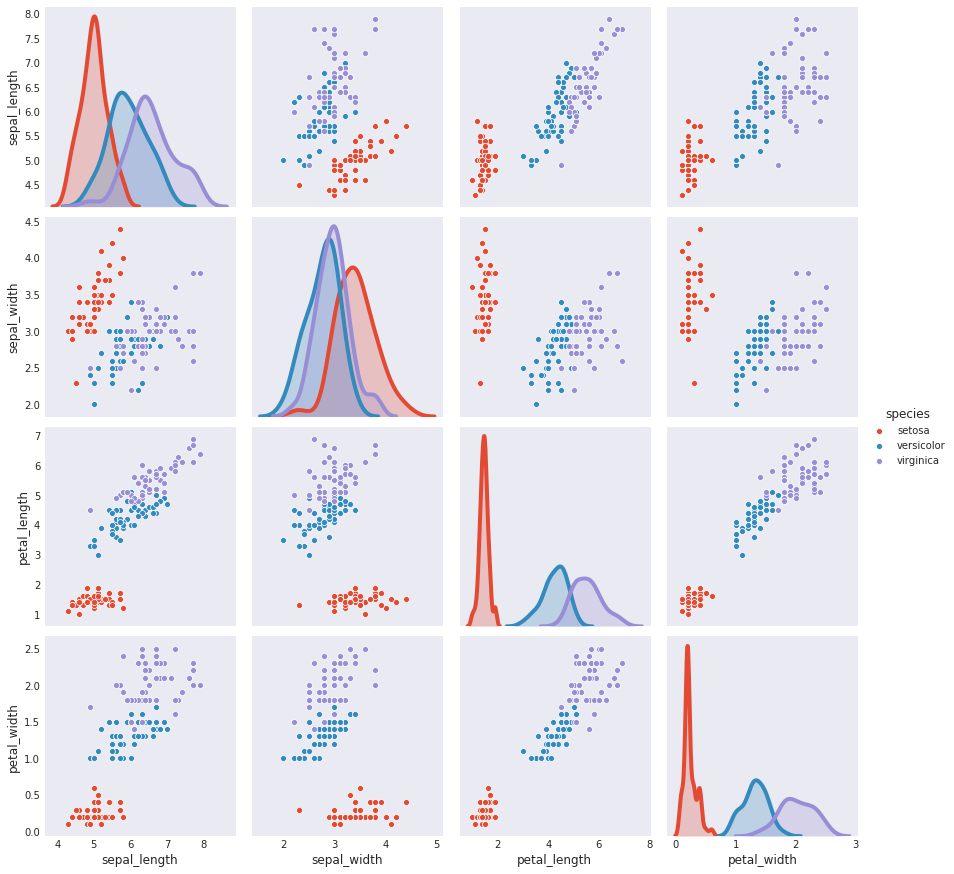

In [134]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(df, hue="species", size=3, diag_kind="kde")
plt.show()

### Histogram

In [95]:
iris_setosa = df.loc[df['species'] == 'setosa']
iris_versicolor = df.loc[df['species'] == 'versicolor']
iris_virginica = df.loc[df['species'] == 'virginica']

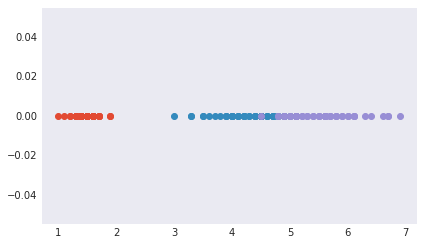

In [96]:
#Plotting Species Vs Petal_length
plt.plot(iris_setosa['petal_length'], np.zeros_like(iris_setosa['petal_length']), 'o')
plt.plot(iris_versicolor['petal_length'], np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica['petal_length'], np.zeros_like(iris_virginica['petal_length']), 'o')
plt.show()

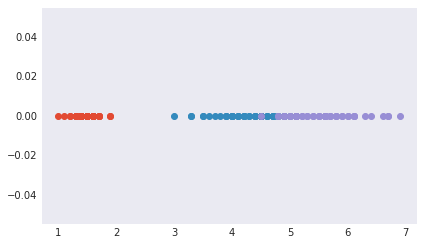

In [97]:
#Plotting Species Vs Petal_Width
plt.plot(iris_setosa['petal_length'], np.zeros_like(iris_setosa['petal_width']), 'o')
plt.plot(iris_versicolor['petal_length'], np.zeros_like(iris_versicolor['petal_width']), 'o')
plt.plot(iris_virginica['petal_length'], np.zeros_like(iris_virginica['petal_width']), 'o')
plt.show()

### Univariate Analysis

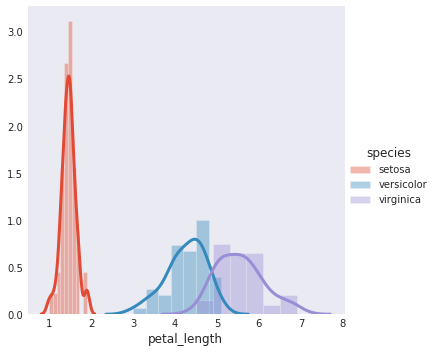

In [107]:
#Plotting Distribtution plot or PDF (Probability Distrubtion Function)

# sns.distplot(iris_setosa['petal_length'], hist=False)
# sns.distplot(iris_versicolor['petal_length'], hist=False)
# sns.distplot(iris_virginica['petal_length'], hist=False)
# plt.show()

sns.FacetGrid(df, hue='species', height=5).map(sns.distplot, 'petal_length', kde_kws=dict(linewidth=3)).add_legend()

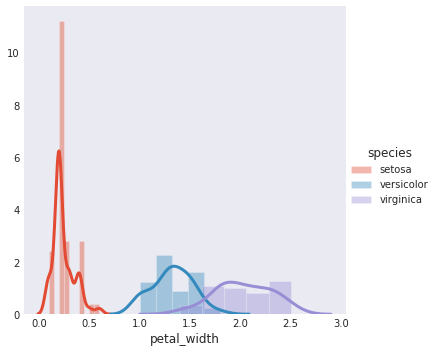

In [109]:
sns.FacetGrid(df, hue='species', height=5).map(sns.distplot, 'petal_width', kde_kws=dict(linewidth=3)).add_legend()
plt.show()

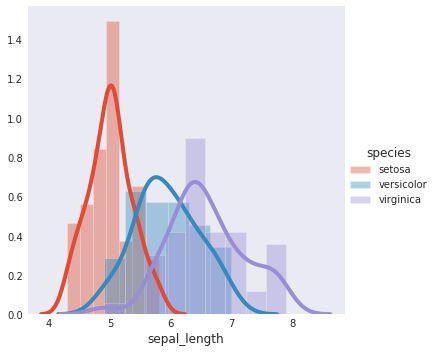

In [111]:
sns.FacetGrid(df, hue="species", height = 5).map(sns.distplot, "sepal_length").add_legend()
plt.show()

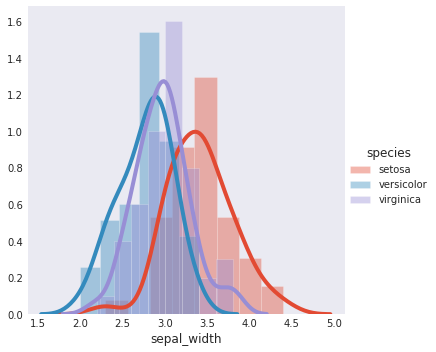

In [113]:
sns.FacetGrid(df, hue="species", height = 5).map(sns.distplot, "sepal_width").add_legend()
plt.show()

As We Can see that Petal_width vs Petal_length can be used to seperate Species easily as compared to other values

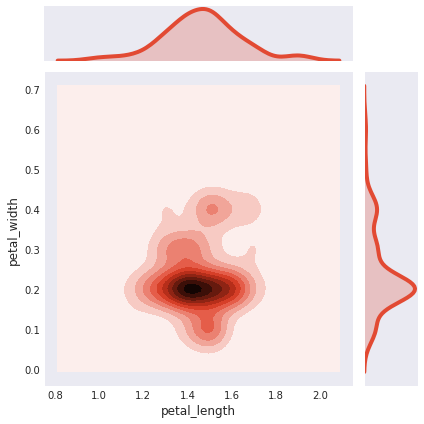

In [115]:
# 2-D DensityPlot, contors-plot
# This is Contour-Density-Plot
sns.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde");
plt.show();

### Plotting BoxPlot and Violin Plot

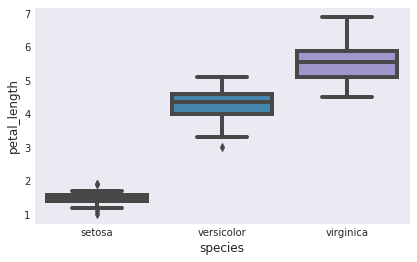

In [120]:
sns.boxplot(x='species', y='petal_length', data=df)
plt.show()

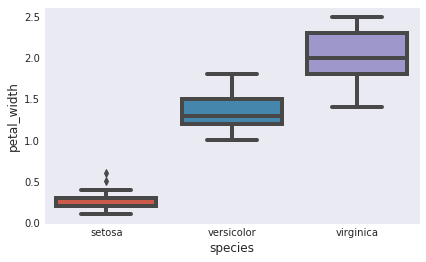

In [121]:
sns.boxplot(x='species', y='petal_width', data=df)
plt.show()

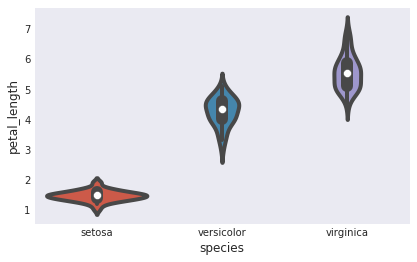

In [131]:

# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="species", y="petal_length", data=df, size=10)
plt.show()

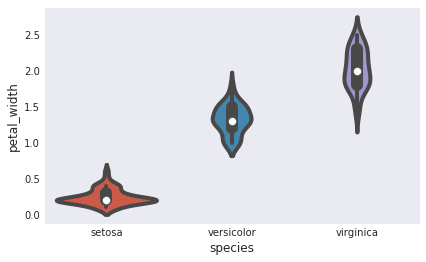

In [132]:
sns.violinplot(x="species", y="petal_width", data=df, size=10)
plt.show()

### Mean, Variance(Spread of Plot), Std

In [114]:
#Mean, Variance, Std-deviation,  
print("Mean:")
print(np.mean(iris_setosa["petal_length"]))
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))

Mean:
1.464
5.5520000000000005
4.26

Std-dev:
0.17176728442867112
0.546347874526844
0.4651881339845203


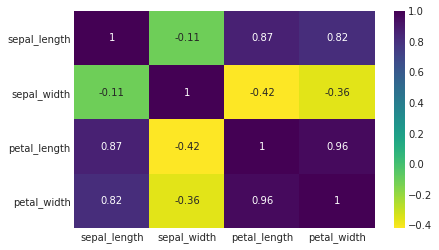

In [129]:
# Confusion Matrix
sns.heatmap(df.corr(), cmap='viridis_r', annot=True)
plt.show()

# Training Model

Using petal_length & petal_width to predict species of flower

In [145]:
X = df[['petal_length', 'petal_width']]
Y = df['species']
print(X.shape)
print(Y.shape)

(150, 2)
(150,)


In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [147]:
print(X_train.shape)
print(X_test.shape)

(120, 2)
(30, 2)


## Logistic Regression

In [148]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [153]:
from sklearn.metrics import accuracy_score, confusion_matrix
Y_pred = logistic_classifier.predict(X_test)
print("Accuracy: {} ".format(accuracy_score(Y_test, Y_pred)))
print("Confustion Matrix \n")
print(confusion_matrix(Y_test, Y_pred))

Accuracy: 0.9666666666666667 
Confustion Matrix 

[[ 8  0  0]
 [ 0 12  0]
 [ 0  1  9]]


## KNN 

In [154]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski', p=2)
knn_classifier.fit(X_train, Y_train)
Y_pred = knn_classifier.predict(X_test)
print("Accuracy: {} ".format(accuracy_score(Y_test, Y_pred)))
print("Confustion Matrix \n")
print(confusion_matrix(Y_test, Y_pred))

Accuracy: 0.9666666666666667 
Confustion Matrix 

[[ 8  0  0]
 [ 0 12  0]
 [ 0  1  9]]


## Decision Tree 

In [155]:
from sklearn.tree import DecisionTreeClassifier
decisionTree_classifier = DecisionTreeClassifier(criterion='entropy')
decisionTree_classifier.fit(X_train, Y_train)
Y_pred = decisionTree_classifier.predict(X_test)
print("Accuracy: {} ".format(accuracy_score(Y_test, Y_pred)))
print("Confustion Matrix \n")
print(confusion_matrix(Y_test, Y_pred))

Accuracy: 0.9333333333333333 
Confustion Matrix 

[[ 8  0  0]
 [ 0 12  0]
 [ 0  2  8]]


## Random Forest

In [156]:
from sklearn.ensemble import RandomForestClassifier
randomForest_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy')
randomForest_classifier.fit(X_train, Y_train)
Y_pred = randomForest_classifier.predict(X_test)
print("Accuracy: {} ".format(accuracy_score(Y_test, Y_pred)))
print("Confustion Matrix \n")
print(confusion_matrix(Y_test, Y_pred))

Accuracy: 0.9333333333333333 
Confustion Matrix 

[[ 8  0  0]
 [ 0 12  0]
 [ 0  2  8]]


## Naive Bayes Classifier

In [157]:
from sklearn.naive_bayes import GaussianNB
naiveBayes_classifier = GaussianNB()
naiveBayes_classifier.fit(X_train, Y_train)
Y_pred = naiveBayes_classifier.predict(X_test)
print("Accuracy: {} ".format(accuracy_score(Y_test, Y_pred)))
print("Confustion Matrix \n")
print(confusion_matrix(Y_test, Y_pred))

Accuracy: 0.9666666666666667 
Confustion Matrix 

[[ 8  0  0]
 [ 0 12  0]
 [ 0  1  9]]


## SVM 

In [161]:
# Linear SVC
from sklearn.svm import SVC
supportVector_classifier_linear = SVC(kernel='linear')
supportVector_classifier_linear.fit(X_train, Y_train)
Y_pred = supportVector_classifier_linear.predict(X_test)
print("Accuracy: {} ".format(accuracy_score(Y_test, Y_pred)))
print("Confustion Matrix \n")
print(confusion_matrix(Y_test, Y_pred))

Accuracy: 0.9666666666666667 
Confustion Matrix 

[[ 8  0  0]
 [ 0 12  0]
 [ 0  1  9]]


In [162]:
# Non-Linear SVC
supportVector_classifier = SVC(kernel='rbf')
supportVector_classifier.fit(X_train, Y_train)
Y_pred = supportVector_classifier.predict(X_test)
print("Accuracy: {} ".format(accuracy_score(Y_test, Y_pred)))
print("Confustion Matrix \n")
print(confusion_matrix(Y_test, Y_pred))

Accuracy: 0.9333333333333333 
Confustion Matrix 

[[ 8  0  0]
 [ 0 12  0]
 [ 0  2  8]]
